# Welcome to the Dark Art of Coding:
## Introduction to Data Science Fundamentals
Basic Statistics

From count, min, max to variance/standard deviation

<img src='../images/logos.3.600.wide.png' height='250' width='300' style="float:right">

# Main objectives
---

You will be able to:

* Understand how to calculate counts, minimums and maximums
* Understand the measures of central tendencies and the differences between: 
   * mean
   * median
   * mode
* Understand measures of dispersion and the differences between:
   * simple spread
   * quantiles
   * interquartile ranges
   * variance
   * standard deviation
* Understand measures of correlation and the difference between:
   * covariance
   * correlation

# A broad overview
---




To help us understand some of the concepts we are gonna explore, we will explore most of these measures in several ways:

* through small, simple datasets
* through a larger more sophisticated dataset
* through hand-developed code
* through related functions found in Python's Standard Library and in major data science libraries such as numpy, scipy, and pandas 

To get us started, let's take a look at our large dataset. To do so, we will plot the data using the matplotlib library. 

## Defects in patches of parts

Let's simulate the number of defects within a series of part batches.

Given any batch of parts, some of the parts will be defective.

Each number below represents the number of defects in a single batch.

In [2]:
num_defects =  [99, 52, 42, 44, 27, 22, 22, 24, 22, 21,
                21, 18, 18, 15, 19, 19, 18, 17, 18, 16,
                16, 17, 18, 15, 15, 13, 11, 14, 14, 13,
                14, 14, 14, 13, 14, 14, 14, 14, 12, 14,
                13, 12, 11, 12, 13, 13, 12, 13, 11, 13,
                11, 12, 12, 10, 10, 11, 12, 13, 10, 12,
                11, 10, 12, 12, 11, 11, 9, 9, 9, 11,
                12, 8, 8, 10, 8, 10, 11, 10, 9, 10,
                10, 8, 8, 11, 10, 9, 8, 8, 10, 10,
                7, 7, 7, 8, 8, 7, 7, 8, 7, 7,
                9, 7, 7, 10, 7, 8, 9, 9, 6, 6,
                8, 8, 9, 7, 7, 9, 6, 8, 9, 8,
                9, 9, 6, 8, 9, 7, 8, 6, 8, 6,
                6, 6, 6, 6, 6, 8, 7, 8, 7, 5,
                6, 8, 8, 8, 8, 5, 4, 6, 6, 4,
                6, 6, 4, 5, 7, 5, 7, 6, 5, 4,
                6, 4, 7, 5, 6, 4, 4, 6, 6, 3,
                5, 6, 6, 4, 6, 3, 3, 3, 5, 5,
                5, 3, 2, 5, 2, 3, 2, 4, 3, 2,
                5, 2, 2, 2, 3, 4, 4, 4, 5, 5,
                3, 5, 4, 2]         

In [3]:
# The following enables inline plots
# and import matplotlib.pyplot uses plt as an alias

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# importing the Counter class helps us simplify the counting process

from collections import Counter

# Simple Histogram
---

We will use a histogram to help visualize our defects data and then we will use various statistical evaluations to examine that data in greater detail.

In [5]:
# Let's count how many times each defect count appears
#     and look at the five most frequent counts

defect_counts = Counter(num_defects)

for defect_count, freq in defect_counts.most_common(5):
    print(defect_count, '>  ', freq)

8 >   24
6 >   24
7 >   18
5 >   15
9 >   14


## Counters behave a lot like dictionaries, but...

they along with the `.most_common()` function, they have another interesting feature

if you look up a key that does not exist, you get back a `0` value (versus a `KeyError` that you would get back from a dictionary).

For example...

```
>>> defect_count[77]     # does not exist
0

>>> defect_count[8]      # does exist
24
```

In [6]:
# Let's create a series of x values 
#     and parse the defect counts for each of the values.
# In this case, if we try to extract the value associated with a key
#     that does not exist, we simply get back a 0.

x_values = range(101)
y_values = [defect_counts[x] for x in x_values]

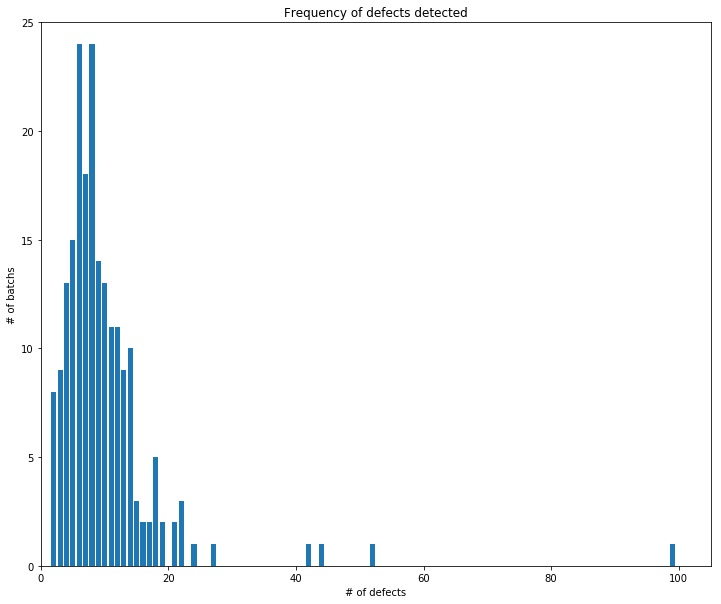

In [7]:
# Let's craft a bar chart using our x and y values...
#     For now, I don't want to focus too much on the mechanics of creating the 
#     graph... just on what the graph can tell us at a glance

#     We will use this picture to help us get a sense for what the data looks like

plt.figure(figsize=(12, 10))
plt.bar(x_values, y_values)
plt.axis([0, 105, 0, 25])
plt.title('Frequency of defects detected')
plt.xlabel('# of defects')
plt.ylabel('# of batchs')
plt.show()

# Simple statistics: 
## count, maximum, minimum

In [8]:
# len() returns the total number of elements in a Python sequence

num_points = len(num_defects)
print("Number of data points:", num_points)

Number of data points: 204


In [9]:
# max() and min() return the maximum (or minimum) value from a 
#     Python sequence

largest_value = max(num_defects)
smallest_value = min(num_defects)

In [10]:
print("Largest value:", largest_value)
print("Smallest value:", smallest_value)

Largest value: 99
Smallest value: 2


# Central Tendencies

* mean
* median
* mode

In [11]:
# We can create a straight forward function to calculate the mean 
#     (also known as the average) of a sequence of values.

def mean(values):
    '''Return the mean (or average) of a sequence of values.
    
    >>> mean([1, 2, 3, 4])
    2.5
    
    >>> mean([1, 2, 3, 4, 5])
    3.0
    
    '''
    return sum(values) / len(values)

In [12]:
# temporarily, let's use a small number of values

mean([1, 2, 3, 4])         # even number of values

2.5

In [13]:
mean([1, 2, 3, 4, 5])      # odd number of values

3.0

In [14]:
mean(num_defects)

9.965686274509803

In [15]:
# We can create a straight forward function to calculate the median 
#     The median is the center-most value in a sorted sequence of values
#     If there are an even number of items, the median is the average of
#     the two center-most values.

def median(values):
    """Return the median value from a sequence of values
    
    >>> median([1, 3, 5])          # odd number of values
    3
    
    >>> median([1, 3, 5, 7])       # even number of values
    4.0
    """
    
    num = len(values)
    sorted_values = sorted(values)
    centerpoint = num // 2            # truncate any floats...
    
    if num % 2 == 1: 
        # return the center value if n is odd
        return sorted_values[centerpoint]
    
    else:
        # return the average of the two center-most values
        # if num is even
        c1 = centerpoint - 1
        c2 = centerpoint
        return (sorted_values[c1] + sorted_values[c2]) / 2
    

In [16]:
# median of an odd number of values

odd = [1, 2, 3]

median(odd)

2

In [17]:
# median of an even number of values
# REMINDER: median sorts the values in the sequence before 
#     returning any values

even = [42, 1, 5, 6]

median(even)    

5.5

In [18]:
# median num of tweets recieved

median(num_defects)

8.0

In [19]:
# We can create a straight forward function to calculate the mode 
#     The mode is the most frequently found value(s) in a sorted 
#     sequence of values

from collections import Counter

def mode(values):
    """Returns a list of the most common (frequent) value(s) 
    
    If there is more than one element with the same maximum frequency, then
    return all such elements as a list
    """
    
    mode_values = {}
    counts = Counter(values)
    max_count = max(counts.values())
    
    return [value for value, count in counts.items() if count == max_count]        

In [20]:
mode([1, 2, 3, 4, 4, 4])     # single number is most frequent

[4]

In [21]:
mode([1, 2, 3, 3, 4, 4])     # two numbers are most frequent

[3, 4]

In [22]:
mode(num_defects)

[8, 6]

## frequency table

Along with `mean`, `mode`, `median` it is sometimes useful to see more broadly how frequently the various values appear. A frequency table is useful for this:

In [23]:
from collections import Counter

def freq_table(values):
    """Returns a series of values and counts in a frequency table 
    
    """
    
    frequencies = Counter(values)
    print('Value\tFrequency')
    
    for value, count in frequencies.most_common():
        print('{}\t{}'.format(value, count))

In [24]:
freq_table([7, 8, 9, 9, 9, 6, 6])

Value	Frequency
9	3
6	2
7	1
8	1


In [25]:
freq_table(defect_counts)

Value	Frequency
8	24
6	24
7	18
5	15
9	14
10	13
4	13
11	11
12	11
14	10
13	9
3	9
2	8
18	5
22	3
15	3
21	2
19	2
17	2
16	2
99	1
52	1
42	1
44	1
27	1
24	1


# Measures of Dispersion
## maximum, minimum

The simplest measures of dispersion are based on the minimum and maximum values. Python has built-in methods to calculate maximum and minimum values:

* `max()`
* `min()`

In [26]:
print("Largest value:", max(num_defects))
print("Smallest value:", min(num_defects))

Largest value: 99
Smallest value: 2


## Simple spread

Using the maximum and minimum values, you can calculate the range of spread.

In [27]:
def data_range(x):
    '''Returns the range (i.e. the difference) between the 
    highest and lowest values
    '''
    
    return max(x) - min(x)

In [28]:
data_range([5, 3, 4, 2, 1])

4

In [29]:
data_range(num_defects)

97

## Downsides of using simple spread:

A simple spread is very susceptible to outliers which may not take into account where the **majority** of the datapoints lie...

```
* [7, 6, 7, 5, 7, 8]    # range of 3 
* [7, 6, 7, 5, 7, 99]   # range of 94
```

## Quantiles and interquartile ranges

A method to overcome the weakness of simple spread is to use a narrower range. One way to create a narrower range is to calculate quantiles and interquartile ranges.

|Term|Definition|
|:--- |:--- |
|quantile|a cutpoint OR dividing point in a range of values creating contiguous intervals with equal probabilities|
|quartile|a value that cuts your data into quarters|
|interquartile range|the range between the lower quartile and upper quartile|

In [31]:
def quantile(values, percentile):
    """Returns the pth-percentile value in a sequence of values
    """
    
    p_index = int(percentile * len(values))
    return sorted(values)[p_index]

In [32]:
# Given a sequence of values, we can calculate a given quantile.
# In this case, we calculate the quantile at the halfway mark (0.5)
#     or roughly the median.

grades1 = [85, 87, 89, 55, 65, 67, 75, 80, 91, 96]        # ten values

quantile(grades1, .5)

85

In [33]:
grades2 = [85, 87, 89, 55, 65, 67, 75, 80, 91, 96, 99]    # eleven values

quantile(grades2, .5)

# NOTE: This is less detailed than median
#     and does NOT account for the length of the dataset in
#     terms of odd/even num of values

85

In [34]:
# While not as sophisticated as our median calc,
#     we can calc other quantiles, such as the 25th percentile
#     or 75th percentile
#     i.e. the quartiles

print(quantile(grades2, .25))
print(quantile(grades2, .75))

67
91


In [35]:
# To see the percentile breakdown of defects, we can calculate
#     which counts fall into which percentiles
#
# It is important to note that the percentile calc simply finds the
#     NEAREST or CLOSEST index in the list to the given percentile
#     and returns the value stored at that index.

for percent in [0.10, 0.25, 0.75, 0.90, 0.95, 0.999]:
    q = quantile(num_defects, percent)
    
    print('Percent: {}\t{}'.format(percent, q))

Percent: 0.1	4
Percent: 0.25	6
Percent: 0.75	12
Percent: 0.9	16
Percent: 0.95	21
Percent: 0.999	99


In [36]:
# To show the range between two quantile values, we 
#     can use an interquantile range.
# It is very common to use quantiles of 25% and 75%, but 
#     other quantiles may be used as well:
#     10% <-> 90%
#     etc


def interquartile_range(values):
    '''Return the difference between the 75% and 25% percentiles.
    '''
    return quantile(values, 0.75) - quantile(values, 0.25)

In [37]:
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# find the quantile values at 25% and 75%
print(quantile(values, 0.25), '<->', quantile(values, 0.75))

# calculate the range
print(interquartile_range([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))

3 <-> 8
5


In [38]:
# We can calculate the interquartile range for our defects data

interquartile_range(num_defects)

6

## Downsides of using interquartile range

The interquartile range helps eliminate some of the risks associated with outliers, but still has some weaknesses:

* it can only tell you the difference between a 'high' value and a 'low' value
* it does NOT tell you how often the high values OR low values occur versus how often values occur near the center

We need a method to more accurately measure variability.

## Variance and standard deviation

There are several techniques to help evaluate the spread of the data and how much data varies. These techniques build upon each other.

**Average distance from the mean**

`Average distance from the mean`: One method that **seems**, at first look, to be a reasonable solution is to simple calculate the average distance of each value from the mean.

The weaknesss with calculating the average distance from the mean is that positive values and negative values cancel each other out and you lose the measure of spread:

```
nums = [1, 2, 9]
mean: 4

* 1 - 4 = -3
* 2 - 4 = -2
* 9 - 4 =  5
------------
total   =  0
```

In [39]:
def diff_mean(values):
    """Calculate the difference from the mean for every value in a 
    sequence of values
    
    This has the effect of translating the values so that the new mean
    is zero (0).
    """
    
    x_bar = mean(values)
    return [value - x_bar for value in values]    

In [40]:
diffs = diff_mean([1, 2, 9])

mean(diffs)

0.0

In [41]:
mean(diff_mean(num_defects))

# 1.8634331550571255e-14
# this is effectively zero... 

1.8634331550571255e-14

**Variance**

`Variance`: To calculate variation, a popular method is to calculate the variance, which is defined as:

`The average of the 'difference OR distance of values from the mean' squared.`

The benefit of squaring each of the difference of values from the mean before using them to calculate the average is that squared numbers are always positive.

```
nums = [1, 2, 9]
mean: 4

* (1 - 4)^2 =  9
* (2 - 4)^2 =  4
* (9 - 4)^2 = 25
----------------
total       = 38

variance    = 38/3 = 12.6666
```



In [42]:
def variance(values):
    """Return the variance of a sequence of values.
    
    NOTE: this functions presumes that values has a minimum of TWO elements.
    """
    
    num = len(values)
    deviations = diff_mean(values)
    squared_diffs = [d**2 for d in deviations]
    sum_squared_diffs = sum(squared_diffs)
    
    return sum_squared_diffs / num

In [43]:
variance([1, 2, 9])

12.666666666666666

In [44]:
variance(num_defects)

80.87627354863517

**Standard Deviation**

One of the weaknesses of using the variance is that no one really knows what it means when we say **`distance squared`** or **`difference squared`**.

`Standard Deviation`: To overcome this weakness we often calculate the standard deviation, which is defined as:

`The square root of the variance`

The benefit of the square root is that we are simply using a distance OR a difference.

```
nums = [1, 2, 9]
mean: 4

* (1 - 4)^2 =  9
* (2 - 4)^2 =  4
* (9 - 4)^2 = 25
----------------
total       = 38

std dev     = sqrt(38/3) = 3.5590
```

In [45]:
def standard_deviation(values):
    """Return the standard deviation of a sequence of values
    """
    
    from math import sqrt
    return sqrt(variance(values))

In [46]:
standard_deviation([1, 2, 9])

3.559026084010437

In [ ]:
standard_deviation(num_defects)

# Pro tip... using functions from libraries...

All of the items we have covered here are fairly well represented in statistics literature and in various Python and Data Science libraries, so let's take a look at where you can find these tools

There are several places you might want to start, but these are certainly not the only options:

|Library|Purpose|
|:---|:---|
|**statistics**|Mathematical statistics functions including averages, measures of central location, measures of spread|
|||
|**numpy**|a powerful N-dimensional array object|
||sophisticated (broadcasting) functions|
||tools for integrating C/C++ and Fortran code|
||useful linear algebra, Fourier transform, and random number capabilities|
|||
|**scipy**|SciPy is a collection of mathematical algorithms and convenience functions built on numpy|
||adds power to interactive Python sessions|
||provides the user with high-level commands and classes for manipulating and visualizing data|
| ||
|**pandas**|pandas is a Python package providing fast, flexible, and expressive data structures|
||designed to make working with “relational” or “labeled” data easy and intuitive|
    

In [47]:
import numpy as np
import scipy
import statistics as stats
import pandas as pd

In [48]:
# Create a numpy array from our list of defects

defects = np.array(num_defects)

In [ ]:
# Let's use tab complete to examine our options

defects.

In [49]:
defects.mean()

9.9656862745098032

In [50]:
defects.min()

2

In [51]:
defects.max()

99

In [52]:
print(defects.var())
print(defects.std())

80.8762735486
8.99312368138


In [53]:
# The scipy library gives you access to these same functions

print(scipy.mean(num_defects))
print(scipy.median(num_defects))
print(scipy.var(num_defects))
print(scipy.std(num_defects))

9.96568627451
8.0
80.8762735486
8.99312368138


In [54]:
np.mean?

In [ ]:
scipy.mean?

In [55]:
# The Python statistics library (new in version 3.4 of Python) 
#     has many of the same functions, but with slightly different names

print(stats.mean(num_defects))
print(stats.median(num_defects))
print(stats.variance(num_defects))
print(stats.stdev(num_defects))

9.965686274509803
8.0
81.27467883705205
9.015247020301333


In [56]:
# Lastly, the pandas library allows you to perform similar calculations:

defects_pd = pd.Series(num_defects)

print(defects_pd.mean())
print(defects_pd.median())
print(defects_pd.var())
print(defects_pd.std())

9.96568627451
8.0
81.2746788371
9.0152470203


In [57]:
defects_pd.mean?

In [59]:
defects_pd.value_counts(dropna=False)

6     24
8     24
7     18
5     15
9     14
4     13
10    13
11    11
12    11
14    10
13     9
3      9
2      8
18     5
15     3
22     3
16     2
17     2
19     2
21     2
52     1
24     1
27     1
42     1
44     1
99     1
dtype: int64

# Random stuff for testing purposes
---

# Experience Points
---

## Complete the following exercises:

On the **IPython interpreter** create the following data types:

Data type | Values
----|----
integers | `-10, 0, and 42`
floating point numbers | `-10.0, 0.1, 42.0, and 3.7`
strings | `'x', 'aloha', and 'Dark art of coding'`

<img src='../images/green_sticky.300px.png' width='200' style='float:left'>